In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
import seaborn as sns
import math


In [23]:
data = pd.read_excel("D:/ai/neural networks/power_data_inkw.xlsx")
data.head()

,5551.82208
0,4983.17184
1,4888.39680
2,5072.95872
3,5196.25980
4,5641.29720


In [24]:
data = data.rename(columns={5551.82208:'load'},inplace=False)

In [25]:
data.describe()

,load
count,2183.000000
mean,6393.616060
std,17143.020064
min,3377.919600
25%,5257.520640
50%,5935.910400
75%,6738.692400
max,805444.430400


In [26]:

data.isnull().sum()

load    0
dtype: int64

In [27]:
#checking outliners

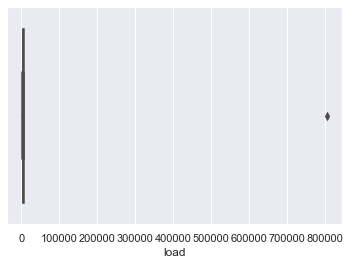

In [28]:
sns.set(style = 'darkgrid')
sns.boxplot(data['load'])

In [29]:
from scipy import stats

z = np.abs(stats.zscore(data.iloc[:,0]))

threshold = 3
print(np.where(z > 3))

(array([928], dtype=int64),)


In [30]:

data.iloc[928,0] = data.iloc[927,0]

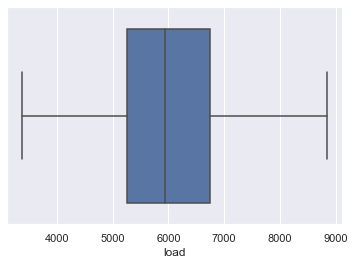

In [31]:
sns.set(style = 'darkgrid')
sns.boxplot(data['load'])

In [55]:
data_x = []
data_x2= []
data_y = []
for i in range(0,len(data)-24):
    data_x.append(data.iloc[i-1,0])
    data_x2.append(data.iloc[i-24,0])
    data_y.append(data.iloc[i+24,0])

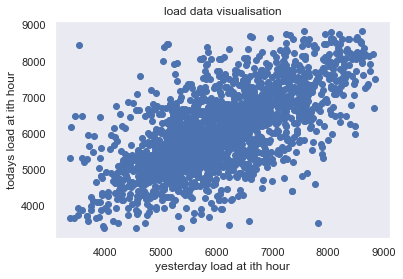

In [57]:
plt.scatter(data_x2,data_y)
plt.title("load data visualisation")
plt.xlabel("yesterday load at ith hour")
plt.ylabel("todays load at ith hour")
plt.grid()

In [59]:
data_xx = pd.DataFrame(data_x)
min_x = float(data_xx.min())
max_x = float(data_xx.max())
data_x22=pd.DataFrame(data_x2)
min_x2=float(data_x22.min())
max_x2=float(data_x22.max())
data_yy = pd.DataFrame(data_y)
min_y = float(data_yy.min())
max_y = float(data_yy.max())
print(min_x)
print(min_y)
print(max_x)
print(max_y)
print(max_x2)
print(min_x2)

3377.9196
3377.9196
8841.66948
8841.66948
8841.66948
3377.9196


In [35]:
#data normalization

In [60]:
x = minmax_scale(data_x)
x2=minmax_scale(data_x2)
y = minmax_scale(data_y)

In [61]:

nmd = []
for i in range(len(data)-24):
  nmd.append([x[i],x2[i],y[i]])



#splitting data


In [62]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(nmd,test_size=0.1)

In [63]:
#training the model

In [64]:
df = pd.DataFrame(data=data_train)

In [65]:
df

,0,1,2
0,0.897549,0.784571,0.960258
1,0.244786,0.197712,0.305212
2,0.426807,0.474566,0.477019
3,0.366232,0.236085,0.420245
4,0.330775,0.309635,0.298137
...,...,...,...
1938,0.471370,0.151579,0.442612
1939,0.560840,0.394682,0.436307
1940,0.580583,0.471370,0.452084
1941,0.246298,0.306468,0.379304


In [66]:
ns = df.shape[0]
ns

1943

In [67]:
#intialization
n=0.1
i=0 
epochs=2500
m1=1
m2=1
c=-1
EEm1=0
EEm2=0
EEc=0
expo=10**(-8)
dm1=0
dm2=0
dc=0
mome=0.9

In [68]:
while i<epochs:
    
    for j in range(0,ns):
        gm1=(-1)*(df[2][j]-m1*df[0][j]-c)*df[0][j]
        gm2=(-1)*(df[2][j]-m2*df[1][j]-c)*df[1][j]
        gc=(-1)*(df[2][j]-m1*df[0][j]-c)
        
        EEm1=mome*EEm1+(1-mome)*(gm1**2)
        EEm2=mome*EEm2+(1-mome)*(gm2**2)
        EEc=mome*EEc+(1-mome)*(gc**2)
        f1 = math.sqrt(EEm1 + expo)
        f2 = math.sqrt(EEm2 + expo)
        f21= math.sqrt(EEc + expo)
        dm1 = -1*(n/f1)*gm1
        dm2=-1*(n/f2)*gm2
        dc = -1*(n/f21)*gc
       
        m1=m1+dm1
        m2=m2+dm2
        c=c+dc
    
    i=i+1

In [69]:
print(m1,m2,c)

0.7064174518669655 0.7719410441240041 0.3751768050812824


In [70]:
df['yp']=np.nan

In [71]:
for i in range(0,ns):
    df['yp'][i]=m1*df[0][i]+m2*df[1][i]+c


In [72]:
df

,0,1,2,yp
0,0.897549,0.784571,0.960258,1.614864
1,0.244786,0.197712,0.305212,0.700720
2,0.426807,0.474566,0.477019,1.043017
3,0.366232,0.236085,0.420245,0.816133
4,0.330775,0.309635,0.298137,0.847862
...,...,...,...,...
1938,0.471370,0.151579,0.442612,0.825171
1939,0.560840,0.394682,0.436307,1.076035
1940,0.580583,0.471370,0.452084,1.149181
1941,0.246298,0.306468,0.379304,0.785741


In [73]:
from sklearn.metrics import mean_squared_error

In [74]:
mse_train = mean_squared_error(df[1],df['yp'])

In [76]:
mse_train

0.38291522501762737

In [77]:
df = pd.DataFrame(data=data_test)
ns=df.shape[0]

In [78]:
df['yp']=np.nan
for i in range(0,ns):
    df['yp'][i]=m1*df[0][i]+m2*df[1][i]+c
df

,0,1,2,yp
0,0.333971,0.321531,0.404867,0.859303
1,0.343557,0.161422,0.580583,0.742479
2,0.657984,0.603891,0.583721,1.306157
3,0.342073,0.284443,0.494080,0.836396
4,0.373770,0.512311,0.442498,1.034688
...,...,...,...,...
211,0.295626,0.414139,0.334969,0.903704
212,0.974352,0.516818,0.569313,1.462429
213,0.392428,0.442612,0.451799,0.994065
214,0.300562,0.074891,0.139055,0.645310


In [82]:
input_load = float(input("enter load at one day before : "))
input_load2 = float(input("enter load at one hour before : "))
input_load = (input_load - min_x)/(max_x-min_x)
input_load2 = (input_load2 - min_x2)/(max_x2-min_x2)
output_load = (input_load*m1) + (input_load2*m2) +c

output_load = output_load*(max_y-min_y)+min_y

print("predicted load for this hour  : ",output_load)

enter load at one day before : 4456.65
enter load at one hour before : 4662.3
predicted load for this hour  :  7181.291751189479
